# Project Guten-bag-of-words:
### Gutenberg fiction books topic modeling: 

In [37]:
import nltk
from nltk.tokenize import wordpunct_tokenize

import pandas as pd

import numpy as np
import sklearn.feature_extraction.text as text
from sklearn import decomposition

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [38]:
pickloader = open("R_books_df.pkl","rb")
R_books_df = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_books_list.pkl","rb")
clean_books = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_book_titles_list.pkl","rb")
novel_names = pickle.load(pickloader)
pickloader.close()

pickloader = open("R_book_authors_list.pkl","rb")
authors_list = pickle.load(pickloader)
pickloader.close()

### Removing contractions:

In [30]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

expandContractions(clean_books[0].lower())

clean_books_expanded = [expandContractions(book.lower()) for book in clean_books]

clean_books = clean_books_expanded
# clean_books[0][0:10000]

### Stemming/Lemming:

In [31]:
# # Stemming: more aggressive

# stem_books = []
# for book in clean_books:
#     stem_book = [stemmer.stem(word) for word in wordpunct_tokenize(book)]
#     stem_book = (' ').join(stem_book)
#     stem_books.append(stem_book)

In [32]:
# Lemming: a gentler approach: 
lemma=nltk.stem.WordNetLemmatizer()

lemma_books = []
for book in clean_books:
    lemma_book = [lemma.lemmatize(word) for word in wordpunct_tokenize(book)]
    lemma_book = (' ').join(lemma_book)
    lemma_books.append(lemma_book)

lemma_books[0][0:100]

clean_books = lemma_books

In [34]:
len(clean_books)

1756

### Pickle/unpickle lemmatized books:

In [35]:
# # pickle:
# pickle.dump( clean_books, open( "lemmed_books.pkl", "wb" ) )

In [39]:
# unpickle:
clean_books = pickle.load( open( "lemmed_books.pkl", "rb" ) )

### Vectorizing:

In [4]:
print(len(clean_books)*.005, len(clean_books)*.995, len(clean_books))

8.725 1736.275 1745


In [43]:
from sklearn.feature_extraction import text

# previously using max_df = .995

# extra_stop_words = ['wa', 'did', 'time', 'came', 'knew', 'went', 'thought',
#                     'thing', 'day', 'felt', 'saw', 'took', 'way', 'place', 'began']
extra_stop_words=[]
my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

ngrams=1

vectorizer = text.TfidfVectorizer(
    stop_words=my_stop_words, ngram_range=(1,ngrams), min_df=3, max_df=.7, token_pattern="\\b[a-z][a-z]+\\b")
dtm = vectorizer.fit_transform(clean_books).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape

(1756, 56840)

### Modeling:

In [44]:
num_topics = 30
NMFmodel = decomposition.NMF(n_components=num_topics, random_state=1)
doctopic = NMFmodel.fit_transform(dtm)

In [45]:
# make a list of the topic words for each topic
num_top_words = 20
topic_words = []
word_weights = []
for topic in NMFmodel.components_:
#     topic = NMFmodel.components_[j]
#     print(len(word_idx),word_idx)
#     print(len([NMFmodel.components_[j][i] for i in word_idx]),[NMFmodel.components_[j][i] for i in word_idx])
#     print(len([topic[i] for i in word_idx]),[topic[i] for i in word_idx])
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
    word_weights.append([topic[i] for i in word_idx])

In [46]:
topicsdf = pd.DataFrame()
topicsdf['topic_num'] = list(range(len(NMFmodel.components_)))
topicsdf['topic_words'] = topic_words
topicsdf['word_weights'] = word_weights
topicsdf.head()

,topic_num,topic_words,word_weights
0,0,"[sea, tree, city, wind, god, round, rock, shal...","[0.39503187554590724, 0.32938430388926543, 0.3..."
1,1,"[thou, thee, thy, shall, ye, spake, king, hast...","[1.3442751140108402, 0.8531789201952171, 0.609..."
2,2,"[mr, miss, lady, mary, sir, gloria, paper, har...","[1.914661244974881, 0.172348059986914, 0.14456..."
3,3,"[king, prince, princess, queen, palace, shall,...","[1.6017865241713538, 1.1831552234836062, 0.997..."
4,4,"[sir, knight, king, launcelot, arthur, ye, tri...","[1.910733772274416, 1.6093728568442742, 1.1329..."


In [47]:
topics = NMFmodel.components_
vocab[600]

'adjustable'

In [48]:
# this weights the topics per document:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)
print('shape: ', doctopic.shape)
print('example: ', doctopic[2])

shape:  (1756, 30)
example:  [0.11516231 0.0164065  0.01732769 0.01942385 0.         0.14240588
 0.02096404 0.         0.         0.00530672 0.00726389 0.00579729
 0.         0.         0.01058895 0.00573523 0.         0.
 0.04536067 0.         0.         0.04440158 0.         0.05203733
 0.02453641 0.         0.         0.21448076 0.23902459 0.01377631]


### Showing the top words for each topic

In [49]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: sea tree city wind god round rock shall shadow sky mountain river street mile darkness
Topic 1: thou thee thy shall ye spake king hast hath god wilt nought folk son lord
Topic 2: mr miss lady mary sir gloria paper harold dr smith john lord sims susan anne
Topic 3: king prince princess queen palace shall answered daughter son fairy till horse father wife brother
Topic 4: sir knight king launcelot arthur ye tristram merlin horse lord clarence gawaine gareth lady castle
Topic 5: state war social general german class british present public political book century common country nation
Topic 6: peter reddy unc billy jimmy fox rabbit sammy skunk coyote granny frog grandfather bowser meadow
Topic 7: conan cimmerian sword valeria priest olivia valerius blood salome aram chamber picts river warrior cliff
Topic 8: car machine maybe paul desk girl office job kid police guy street colonel don building
Topic 9: dorothy ozma oz wizard scarecrow nome woodman glinda tin magic frogman toto trot

### Clustering:

In [50]:
# MiniBatchKMeans(doctopic)

In [51]:
# from sklearn.cluster import SpectralClustering

In [52]:
from sklearn.cluster import KMeans

In [53]:
clustering = KMeans(n_clusters=20)
clusters = clustering.fit_predict(doctopic)

In [54]:
clusters.shape

(1756,)

In [55]:
len(novel_names)

1756

In [110]:
book_clusters = pd.DataFrame()
book_clusters['book'] = novel_names
book_clusters['cluster'] = clusters
book_clusters.head()

,book,cluster
0,Alice's Adventures in Wonderland,11
3339,Through the Looking-Glass,11
7246,The Hunting of the Snark: An Agony in Eight Fits,4
8086,Moby Dick,10
8248,The Song of Hiawatha,1


In [111]:
# list(book_clusters[book_clusters['cluster']==5]['book'])

In [112]:
# find cluster of a particular book:
booktitle="Metamorphosis"
cluster_num = list(book_clusters[book_clusters['book']==booktitle]['cluster'])[0]
list(book_clusters[book_clusters['cluster']==cluster_num]['book'])

['The Lani People',
 'Operation Terror',
 'Warlord of Kor',
 'Time Crime',
 'The Answer',
 'Null-ABC',
 'Flight From Tomorrow',
 'Hunter Patrol',
 'Last Enemy',
 'The Mercenaries',
 'The Return',
 'Temple Trouble',
 'Day of the Moron',
 'Police Operation',
 'Naudsonce',
 'Code Three',
 'Badge of Infamy',
 'Man of Many Minds',
 'Stop Look and Dig',
 'Police Your Planet',
 'Highways in Hiding',
 'Oomphel in the Sky',
 'Ten From Infinity',
 'The Galaxy Primes',
 'Legacy',
 'Sweet Their Blood and Sticky',
 'The Mightiest Man',
 'Subspace Survivors',
 'An Incident on Route 12',
 'The Radiant Shell',
 'Project Mastodon',
 'Security',
 'Sense from Thought Divide',
 'The K-Factor',
 'Warning from the Stars',
 'The Day of the Boomer Dukes',
 'Jubilation, U.S.A.',
 'Measure for a Loner',
 'Question of Comfort',
 'Masters of Space',
 'Suite Mentale',
 'Meeting of the Board',
 'Circus',
 'The Best Made Plans',
 'One-Shot',
 'Toy Shop',
 'Second Sight',
 'And All the Earth a Grave',
 'Untechnologic

In [113]:
# book_clusters = pd.DataFrame()
# for cluster in set(clusters):
#     print(cluster)
#     indeces = [i for i, j in enumerate(list(clusters)) if j == cluster]
#     book_clusters[cluster] = novel_names[[indeces]]

### PCA:

In [114]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2, random_state=0)
#Project the data in 2D

PCAxy = PCA.fit_transform(doctopic)
PCAxy.shape

(1756, 2)

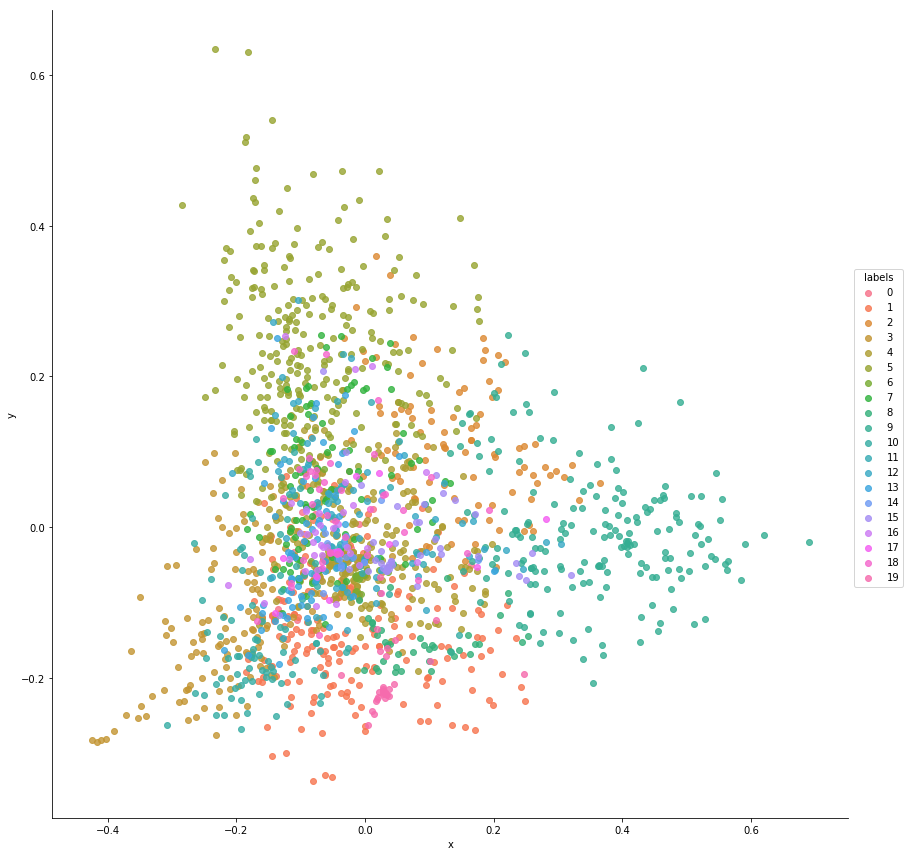

In [115]:
# #Visualize the data
# plt.figure(figsize=(10, 10))
# plt.scatter(PCAxy.T[0],PCAxy.T[1],c=list(clusters))
# plt.show()

# plot data with seaborn

data = pd.DataFrame()
data['x']=PCAxy.T[0]
data['y']=PCAxy.T[1]
data['labels']=list(clusters)

facet = sns.lmplot(data=data, x='x', y='y', hue='labels', 
                   fit_reg=False, legend=True, legend_out=True, size=12, aspect=1)

# Note to myself about lmplot:
# lmplot is strange in that it does not respect the sns.set() or plt figsize settings
# as such, we have to set size and aspect

In [116]:
# #Visualize the data
# plt.figure(figsize=(10, 10))
# for i in range(len(PCAxy)):
#     plt.scatter(PCAxy[i][0], PCAxy[i][1])
# plt.show()

### t-SNE:

In [117]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, metric='cosine')
# tsne = TSNE(n_components=2, random_state=0, metric='euclidean')


#Project the data in 2D

# try using cosine instead of euclidean

X_2d = tsne.fit_transform(doctopic)

In [118]:
X_2d.shape

(1756, 2)

In [119]:
X_2d.T.shape

(2, 1756)

In [120]:
len(clusters)

1756

In [121]:
# for cluster in set(clusters):
#     plotdata=data[data['labels']==cluster]
#     print(plotdata)

In [122]:
# # data[data['labels']==0]
# c_map=range()

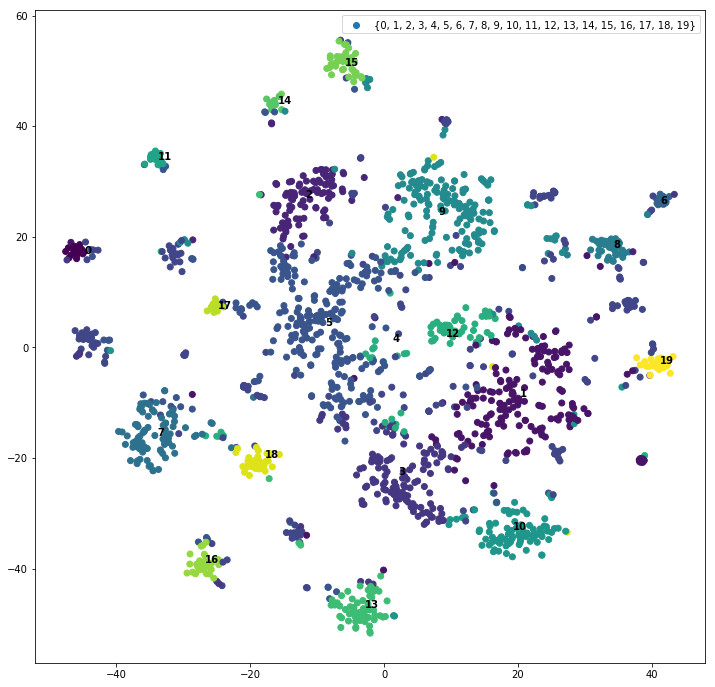

In [123]:
# Make relevant dataframes

data = pd.DataFrame()
data['x'] = X_2d.T[0]
data['y'] = X_2d.T[1]
data['labels'] = list(clusters)

median_cluster_location = data.groupby(['labels']).median().reset_index()
median_cluster_location['x'] = median_cluster_location.x.astype(int)
median_cluster_location['y'] = median_cluster_location.y.astype(int)
median_cluster_location['labels'] = median_cluster_location.labels.astype(str)

#Visualize the data
plt.figure(figsize=(12, 12))
plt.scatter(X_2d.T[0],X_2d.T[1],c=list(clusters),label=set(list(clusters)))
# add annotations one by one with a loop
for line in range(0, median_cluster_location.shape[0]):
#     print(line)
    plt.text(median_cluster_location.x[line]+0.2, median_cluster_location.y[line], median_cluster_location.labels[line],
                   horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend()
plt.show()

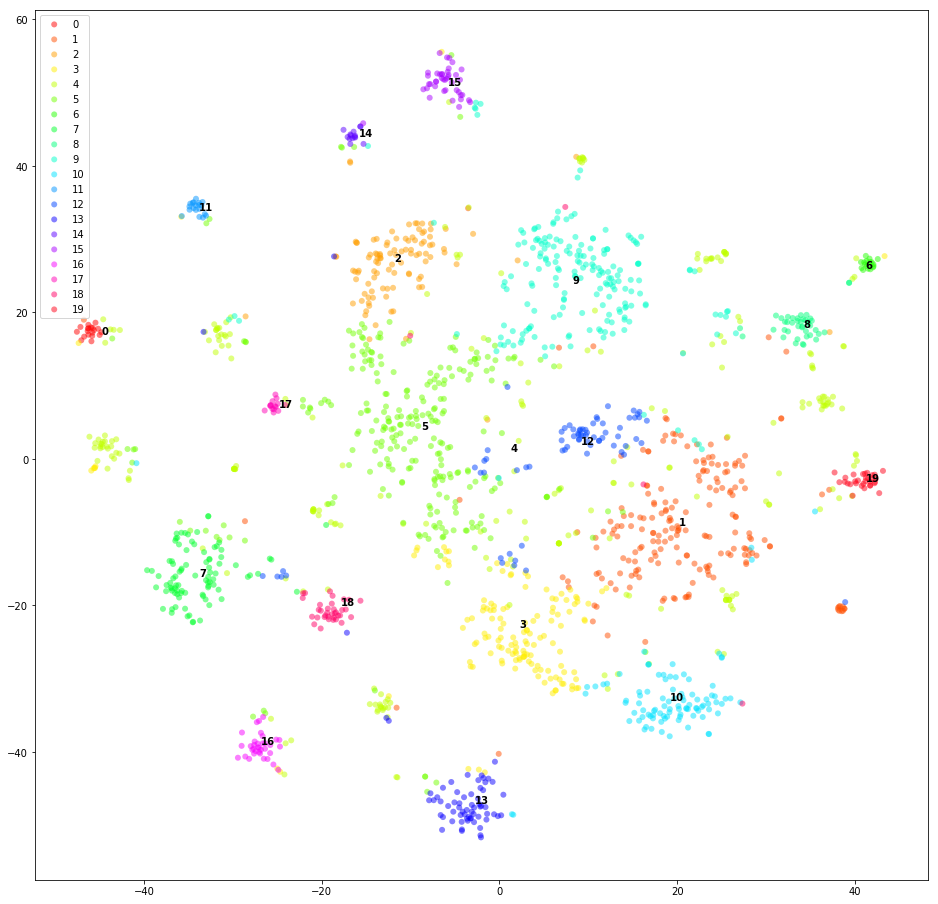

In [124]:
#Visualize the data

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(set(clusters)))
fig, ax = plt.subplots(figsize=(16, 16))

for cluster in set(clusters):
    plotdata=data[data['labels']==cluster]
    x, y = plotdata['x'], plotdata['y']
    ax.scatter(x, y, c=cmap(cluster), label=cluster, alpha=0.5, edgecolors='none')

# add annotations one by one with a loop    
for line in range(0, median_cluster_location.shape[0]):
    ax.text(median_cluster_location.x[line]+0.2, median_cluster_location.y[line], median_cluster_location.labels[line],
                   horizontalalignment='left', size='medium', color='black', weight='semibold')

ax.legend()
# ax.grid(True)

plt.show()

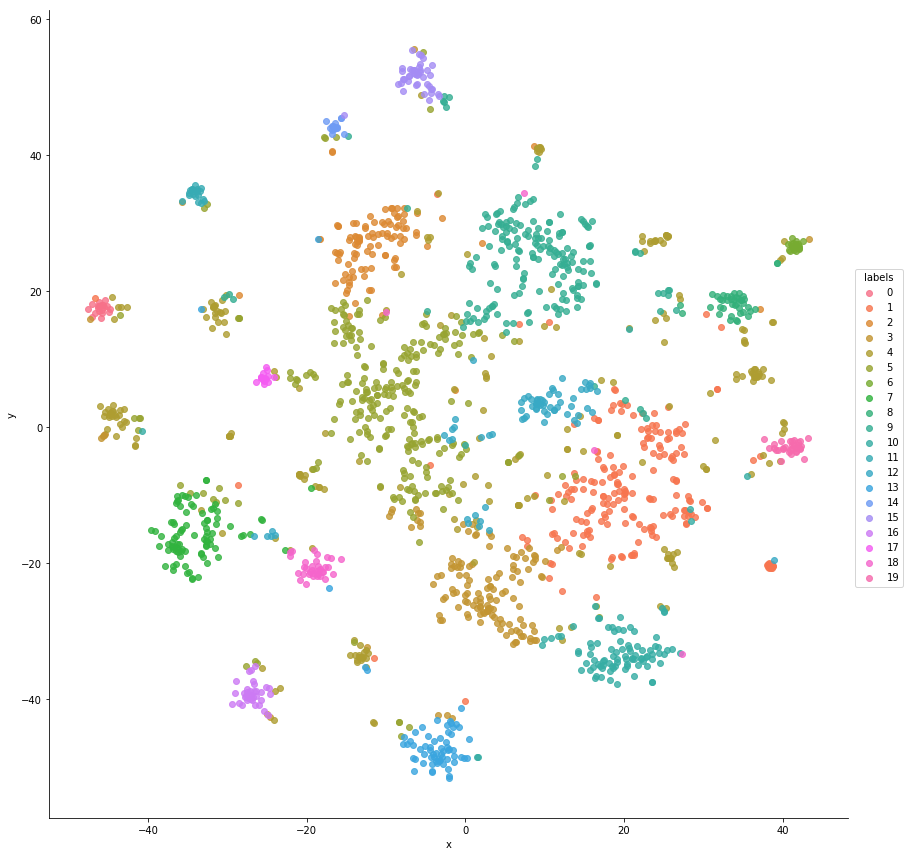

In [125]:
# plot data with seaborn

data = pd.DataFrame()
data['x'] = X_2d.T[0]
data['y'] = X_2d.T[1]
data['labels'] = list(clusters)

median_cluster_location = data.groupby(['labels']).median().reset_index()
median_cluster_location['x'] = median_cluster_location.x.astype(int)
median_cluster_location['y'] = median_cluster_location.y.astype(int)
median_cluster_location['labels'] = median_cluster_location.labels.astype(str)

# markers=[str(i) for i in set(clusters)]

facet = sns.lmplot(data=data, x='x', y='y', hue='labels',
                   fit_reg=False, legend=True, legend_out=True, size=12, aspect=1)

# for line in range(0, median_cluster_location.shape[0]):
# #     print(line)
#     facet.fig.text(median_cluster_location.x[line], median_cluster_location.y[line], median_cluster_location.labels[line],
#                    horizontalalignment='left', size='medium', color='black', weight='semibold')


# Note to myself about lmplot:
# lmplot is strange in that it does not respect the sns.set() or plt figsize settings
# as such, we have to set size and aspect

In [126]:
median_cluster_location['x'] = median_cluster_location.x.astype(int)
median_cluster_location['y'] = median_cluster_location.y.astype(int)
median_cluster_location['labels'] = median_cluster_location.labels.astype(str)

median_cluster_location

,labels,x,y
0,0,-45,17
1,1,20,-9
2,2,-12,27
3,3,2,-23
4,4,1,1
5,5,-9,4
6,6,41,26
7,7,-34,-16
8,8,34,18
9,9,8,24


In [127]:
# g = sns.FacetGrid(final, col="Landform", col_wrap=3,despine=False, sharex=False,col_order=col_order)

# g = g.map(sns.lmplot, 'Feature', 'Importance')

# [plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# for ax, title in zip(g.axes.flat, col_order):
#     ax.set_title(title)

# g.fig.text(0.85, 0.85,'Text Here', fontsize=9) #add text

In [128]:
# print([str(i) for i in set(clusters)])

In [129]:
# print(len(doctopic.tolist()))
# # print(set(clusters))
# # for i in set(clusters):
# #     print(i)

In [130]:
cluster_indeces=[]
doctopiclist = doctopic.tolist()
for clusternum in set(clusters):
    indeces_list=[i for i, x in enumerate(clusters) if x == clusternum]
    cluster_indeces.append(indeces_list)

cluster_words=[]
cluster_max_topic=[]
for clusternum in set(clusters): 
    current_topics = doctopic[cluster_indeces[clusternum]]
    current_topics_sum = sum(current_topics)
    current_topics_sum = current_topics_sum.tolist()
    maxtopic = current_topics_sum.index(max(current_topics_sum))
#     print('Cluster number:',clusternum)
#     print('Maximum topic in that cluster:',maxtopic)
#     print('Top 5 words in that topic:', topic_words[maxtopic][0:5],'\n')
    curr_cluster_words = topic_words[maxtopic]
    cluster_words.append(curr_cluster_words)

    curr_cluster_max_topic = maxtopic
    cluster_max_topic.append(curr_cluster_max_topic)

clusterwordsdf = pd.DataFrame()
clusterwordsdf['clusters'] = range(len(set(clusters)))
clusterwordsdf['max_topic_cluster_words'] = cluster_words
clusterwordsdf['max_topic_num'] = cluster_max_topic    
clusterwordsdf.head()

,clusters,max_topic_cluster_words,max_topic_num
0,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19
1,1,"[sea, tree, city, wind, god, round, rock, shal...",0
2,2,"[mr, miss, lady, mary, sir, gloria, paper, har...",2
3,3,"[ship, planet, control, star, rocket, screen, ...",21
4,4,"[joe, mike, haney, farrell, benson, brett, ken...",13


In [131]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: sea tree city wind god round rock shall shadow sky mountain river street mile darkness
Topic 1: thou thee thy shall ye spake king hast hath god wilt nought folk son lord
Topic 2: mr miss lady mary sir gloria paper harold dr smith john lord sims susan anne
Topic 3: king prince princess queen palace shall answered daughter son fairy till horse father wife brother
Topic 4: sir knight king launcelot arthur ye tristram merlin horse lord clarence gawaine gareth lady castle
Topic 5: state war social general german class british present public political book century common country nation
Topic 6: peter reddy unc billy jimmy fox rabbit sammy skunk coyote granny frog grandfather bowser meadow
Topic 7: conan cimmerian sword valeria priest olivia valerius blood salome aram chamber picts river warrior cliff
Topic 8: car machine maybe paul desk girl office job kid police guy street colonel don building
Topic 9: dorothy ozma oz wizard scarecrow nome woodman glinda tin magic frogman toto trot

In [132]:
list(vocab).index('martian')

30492

In [133]:
clusterwordsdf.columns = ['cluster', 'max_topic_cluster_words', 'max_topic_num']
clusterwordsdf

,cluster,max_topic_cluster_words,max_topic_num
0,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19
1,1,"[sea, tree, city, wind, god, round, rock, shal...",0
2,2,"[mr, miss, lady, mary, sir, gloria, paper, har...",2
3,3,"[ship, planet, control, star, rocket, screen, ...",21
4,4,"[joe, mike, haney, farrell, benson, brett, ken...",13
5,5,"[car, machine, maybe, paul, desk, girl, office...",8
6,6,"[dorothy, ozma, oz, wizard, scarecrow, nome, w...",9
7,7,"[doctor, dr, chet, carnes, harkness, carse, sa...",17
8,8,"[king, prince, princess, queen, palace, shall,...",3
9,9,"[mother, girl, dear, father, aunt, love, lady,...",28


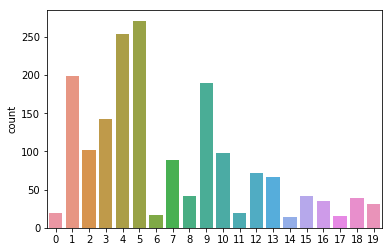

In [134]:
sns.countplot(clusters)

In [135]:
book_clusters.head()

,book,cluster
0,Alice's Adventures in Wonderland,11
3339,Through the Looking-Glass,11
7246,The Hunting of the Snark: An Agony in Eight Fits,4
8086,Moby Dick,10
8248,The Song of Hiawatha,1


In [136]:
book_clusters = pd.merge(clusterwordsdf,
                 book_clusters,
                 on='cluster')

book_clusters.head()

,cluster,max_topic_cluster_words,max_topic_num,book
0,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19,The Adventures of Johnny Chuck
1,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19,Operation: Outer Space
2,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19,Breaking Point
3,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19,Tight Squeeze
4,0,"[johnny, chuck, anne, baba, harry, mccord, der...",19,Far from Home


### Book clusters df for dash genre:

In [137]:
pickler = open("book_clusters.pkl","wb")
pickle.dump(book_clusters, pickler)
pickler.close()

In [ ]:
# #Visualize the data
# plt.figure(figsize=(10, 10))
# for i in range(len(X_2d)):
#     plt.scatter(X_2d[i][0], X_2d[i][1])
# plt.show()

### Clustering on the tSNE: 
### This isn't really valid like clustering independent of the plot as above, but I wanted to see.

In [138]:
clustering = KMeans(n_clusters=20)
clusters = clustering.fit_predict(X_2d)

tsne_book_clusters = pd.DataFrame()
tsne_book_clusters['book'] = novel_names
tsne_book_clusters['cluster'] = clusters
tsne_book_clusters.head()

,book,cluster
0,Alice's Adventures in Wonderland,15
3339,Through the Looking-Glass,15
7246,The Hunting of the Snark: An Agony in Eight Fits,6
8086,Moby Dick,14
8248,The Song of Hiawatha,6


In [139]:
set(clusters)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

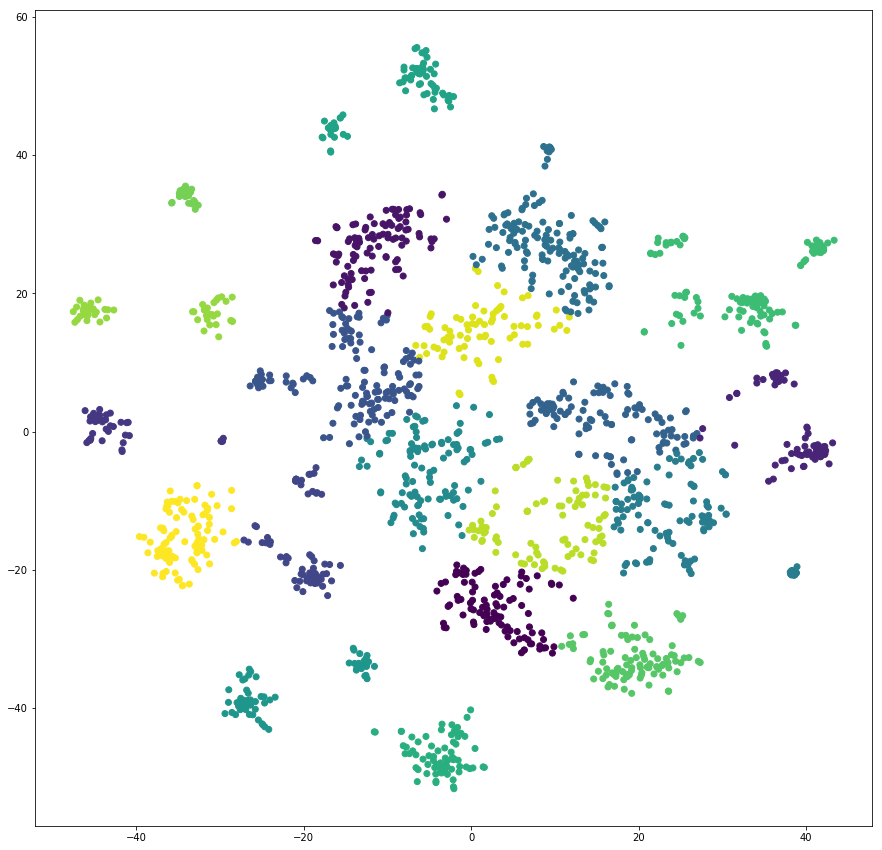

In [140]:
#Visualize the data
plt.figure(figsize=(15, 15))
plt.scatter(X_2d.T[0],X_2d.T[1],c=list(clusters))
plt.show()

In [142]:
print(len(vocab), topics.shape, doctopic.shape)

56840 (30, 56840) (1756, 30)


In [143]:
list(tsne_book_clusters[tsne_book_clusters['book']=='Metamorphosis']['cluster'])[0]

5

In [144]:
list(tsne_book_clusters[tsne_book_clusters['cluster']==6]['book'])

['The Hunting of the Snark: An Agony in Eight Fits',
 'The Song of Hiawatha',
 'The Legend of Sleepy Hollow',
 'Frankenstein; Or, The Modern Prometheus',
 'The Monster Men',
 'Flatland: A Romance of Many Dimensions',
 'The Poison Belt',
 'The Lost World',
 'Flatland: A Romance of Many Dimensions (Illustrated)',
 'The Master Key: An Electrical Fairy Tale Founded Upon the Mysteries of Electricity',
 'The Door in the Wall, and Other Stories',
 'Twice-Told Tales',
 'Looking Backward, 2000 to 1887',
 'The War in the Air',
 'God, the Invisible King',
 'The New Machiavelli',
 'The World Set Free',
 'The Wallet of Kai Lung',
 'The Mirror of Kong Ho',
 'The Research Magnificent',
 'Anthem',
 "Kai Lung's Golden Hours",
 'The Soul of a Bishop',
 'A Journey in Other Worlds: A Romance of the Future',
 'War and the Future: Italy, France and Britain at War',
 'The Coming Race',
 'The Works of Edgar Allan Poe â\x80\x94 Volume 1',
 'The Works of Edgar Allan Poe â\x80\x94 Volume 2',
 'The Works of Edgar

### Plotting the degree to which each book falls into each topic:

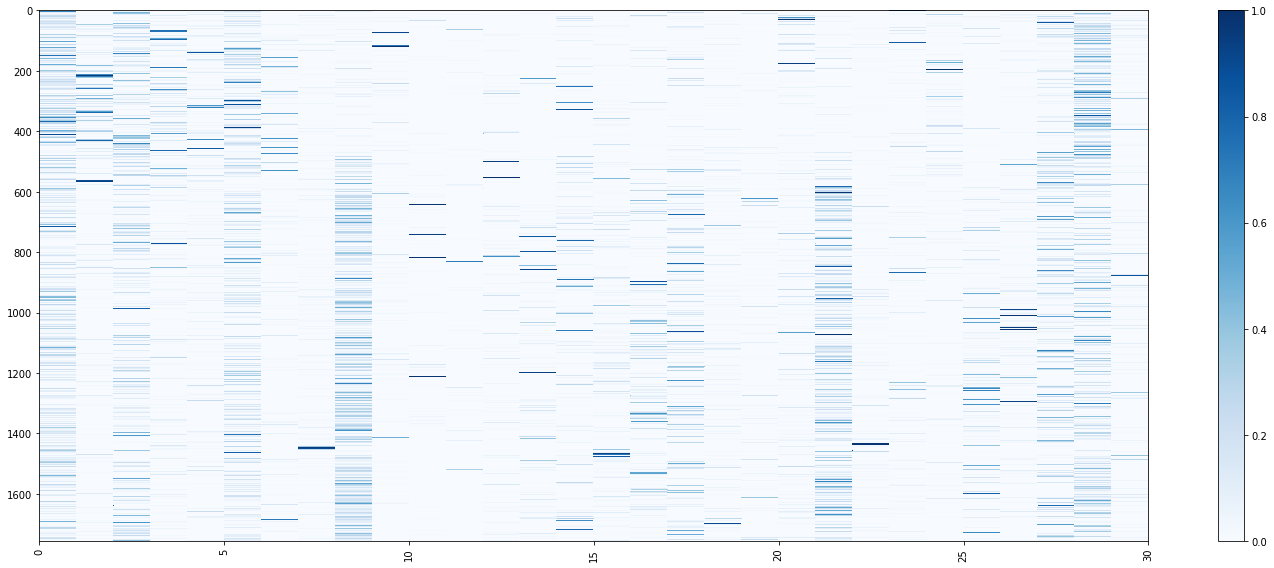

In [146]:
# increase the font size and add a title

N, K = doctopic.shape  # N documents, K topics
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.figure(figsize=(20,8))

plt.pcolor(doctopic, norm=None, cmap='Blues')

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output

# disabling because there are too many to show:
# plt.yticks(np.arange(doctopic.shape[0])+0.5, novels);

# plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in descending alphabetical order
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')

# fix margins
plt.tight_layout() 

plt.show()

In [154]:
novels = novel_names
novels[0]

"Alice's Adventures in Wonderland"

In [155]:
# doctopic_prob_df = pd.DataFrame()
# for i in range(len(doctopic)):
#     doctopic_prob_df[novels[i]] = doctopic[i]
doctopic_prob_df = pd.DataFrame(doctopic)

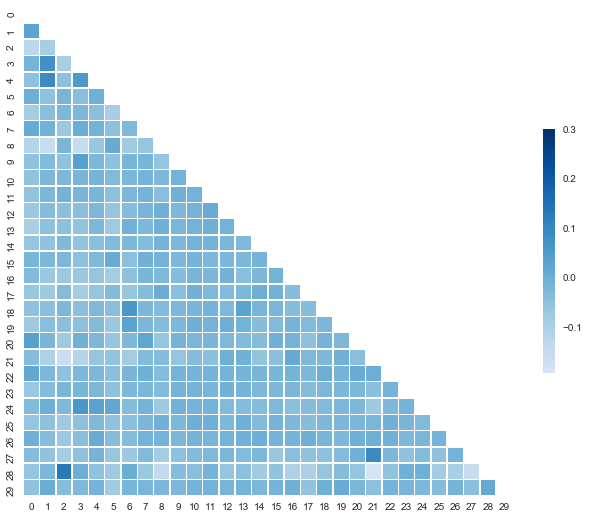

In [156]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = doctopic_prob_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set color map
cmap = "Blues"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

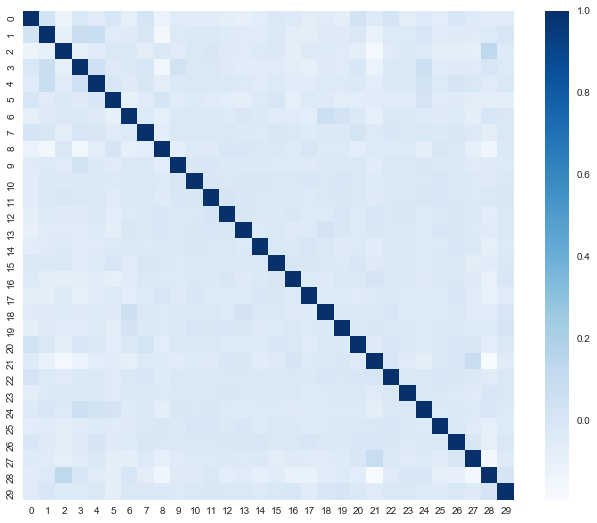

In [158]:
f, ax = plt.subplots(figsize=(11, 9))
corr = doctopic_prob_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap="Blues")

In [150]:
topic_df=pd.DataFrame()
for t in range(len(topic_words)):
#     print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))
    topic_df['Topic %d' %t] = topic_words[t]
topic_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic 0,sea,tree,city,wind,god,round,rock,shall,shadow,sky,mountain,river,street,mile,darkness,hill,stone,beneath,soul,window
Topic 1,thou,thee,thy,shall,ye,spake,king,hast,hath,god,wilt,nought,folk,son,lord,sigurd,unto,yea,thine,shalt
Topic 2,mr,miss,lady,mary,sir,gloria,paper,harold,dr,smith,john,lord,sims,susan,anne,letter,britling,simon,window,margaret
Topic 3,king,prince,princess,queen,palace,shall,answered,daughter,son,fairy,till,horse,father,wife,brother,castle,cried,tree,gold,replied
Topic 4,sir,knight,king,launcelot,arthur,ye,tristram,merlin,horse,lord,clarence,gawaine,gareth,lady,castle,sword,kay,marhaus,unto,queen
Topic 5,state,war,social,general,german,class,british,present,public,political,book,century,common,country,nation,government,modern,empire,community,germany
Topic 6,peter,reddy,unc,billy,jimmy,fox,rabbit,sammy,skunk,coyote,granny,frog,grandfather,bowser,meadow,possum,chuck,jay,toad,paddy
Topic 7,conan,cimmerian,sword,valeria,priest,olivia,valerius,blood,salome,aram,chamber,picts,river,warrior,cliff,girl,crom,shah,city,kerim
Topic 8,car,machine,maybe,paul,desk,girl,office,job,kid,police,guy,street,colonel,don,building,gun,city,george,doc,nodded
Topic 9,dorothy,ozma,oz,wizard,scarecrow,nome,woodman,glinda,tin,magic,frogman,toto,trot,king,shaggy,girl,billina,emerald,betsy,sawhorse


In [149]:
booknum = 0
norm_word_weights = [x/np.sum(word_weights[booknum]) for x in word_weights[booknum]]
# print(norm_word_weights)
# words_with_weights = zip(topic_words[booknum],norm_word_weights)
# list(words_with_weights)
words_with_weights = pd.DataFrame()
words_with_weights['words'] = topic_words[booknum]
words_with_weights['weights'] = norm_word_weights
words_with_weights.head()

,words,weights
0,sea,0.076229
1,tree,0.063561
2,city,0.060740
3,wind,0.058726
4,god,0.055264


### Source for some of this code:
- https://de.dariah.eu/
- https://de.dariah.eu/tatom/topic_model_python.html
- https://de.dariah.eu/tatom/topic_model_visualization.html#topic-model-visualization